# Project for the course: Computational Mathematics
## Group 1: Fois Giulia, Manini Nicolas

 ### Analysis for the core random dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the summary csv, and the csv containing the execution logs for each task

In [29]:
DatasetFolder = 'Core_Convergence'
SummaryFile = 'summary.csv'
LogsFolder = 'logs'

summary_path = "{}/{}".format(DatasetFolder, SummaryFile)
logs_path = "{}/{}".format(DatasetFolder, LogsFolder)

In [30]:
dfSum = pd.read_csv(summary_path)
TaskNames = dfSum['InputName']

def getTaskNames(batch, batchidx):
    batch = str(batch)
    batchidx=str(batchidx)
    isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)
    return list(filter(isTask, TaskNames))

dfSum['Batch'] = dfSum['InputName'].str.split('_').str[1]
dfSum['BatchIndex'] = dfSum['InputName'].str.split('_').str[2]
dfSum['KIndex'] = dfSum['InputName'].str.split('_').str[3]

dfSum['Batch'] = dfSum['Batch'].astype(int)
dfSum['BatchIndex'] = dfSum['BatchIndex'].astype(int)
dfSum['KIndex'] = dfSum['KIndex'].astype(int)

dfSum['TimeIter'] = dfSum['Our_time'].div(dfSum['Our_Iter'])
dfSum['TimeDelta_1Iter'] = dfSum['Svd_time'] - dfSum['TimeIter']
dfSum['ConvenientIters'] = np.floor(dfSum['Svd_time'] .div(dfSum['TimeIter']))

Batches = (dfSum['Batch'].unique())
Batches.sort()

In [31]:
import os

dfLogs = {}

# Read all execution logs
for filename in filter(lambda x:x.endswith(".csv"), os.listdir(logs_path)):
    fn = os.path.splitext(filename)[0]
    name = fn[5:]
    dfTemp = pd.read_csv("{}/{}".format(logs_path, filename))
    dfTemp['ErrorRatio'] = (abs(dfTemp['Error'] - dfTemp['Error'].shift(1))).div(dfTemp['Error'].shift(1))
    dfLogs[name] = dfTemp  

In [32]:
dfSum

,InputName,InputM,InputN,InputRk,TargetRk,Opt_delta,Our_delta,Delta_diff,Svd_time,Our_time,Time_gain,Our_Iter,Batch,BatchIndex,KIndex,TimeIter,TimeDelta_1Iter,ConvenientIters
0,rnd_1_1_1,10,10,10,8,0.071865,0.071865,2.456368e-15,0.000910,0.022926,-0.022016,16,1,1,1,0.001433,-0.000522,0.0
1,rnd_2_1_1,50,50,50,40,0.107497,0.107497,1.004544e-12,0.000813,0.418758,-0.417945,219,2,1,1,0.001912,-0.001099,0.0
2,rnd_3_1_1,100,100,100,90,0.024472,0.024472,4.334380e-14,0.001899,0.428216,-0.426316,65,3,1,1,0.006588,-0.004689,0.0
3,rnd_4_1_1,200,200,200,190,0.015575,0.015575,8.724618e-14,0.004224,6.374720,-6.370496,147,4,1,1,0.043365,-0.039142,0.0
4,rnd_5_1_1,300,300,300,200,0.225300,0.225300,1.052231e-11,0.011923,70.532065,-70.520142,771,5,1,1,0.091481,-0.079558,0.0


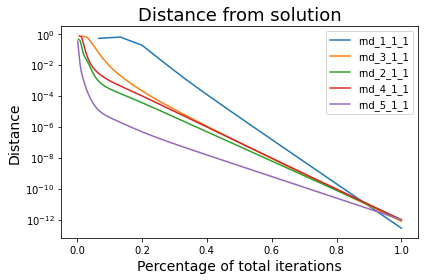

In [33]:
plt.yscale('log')

for name in dfLogs:
    dfTmp = dfLogs[name]
    
    errs = dfTmp['ErrorRatio'][1:]
    it_count = len(errs)
    
    xax = np.array(range(1,it_count+1))/it_count
    yax = errs
    
    plt.plot(xax, yax, label=name)
    

plt.title(r'Distance from solution', fontsize=18)
plt.xlabel("Percentage of total iterations", fontsize=14)
plt.ylabel(r'Distance', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('corerand_linearcon.png', format='png', dpi=300)
plt.show()

In [23]:
xax

array([0.00793651, 0.01587302, 0.02380952, 0.03174603, 0.03968254,
       0.04761905, 0.05555556, 0.06349206, 0.07142857, 0.07936508,
       0.08730159, 0.0952381 , 0.1031746 , 0.11111111, 0.11904762,
       0.12698413, 0.13492063, 0.14285714, 0.15079365, 0.15873016,
       0.16666667, 0.17460317, 0.18253968, 0.19047619, 0.1984127 ,
       0.20634921, 0.21428571, 0.22222222, 0.23015873, 0.23809524,
       0.24603175, 0.25396825, 0.26190476, 0.26984127, 0.27777778,
       0.28571429, 0.29365079, 0.3015873 , 0.30952381, 0.31746032,
       0.32539683, 0.33333333, 0.34126984, 0.34920635, 0.35714286,
       0.36507937, 0.37301587, 0.38095238, 0.38888889, 0.3968254 ,
       0.4047619 , 0.41269841, 0.42063492, 0.42857143, 0.43650794,
       0.44444444, 0.45238095, 0.46031746, 0.46825397, 0.47619048,
       0.48412698, 0.49206349, 0.5       , 0.50793651, 0.51587302,
       0.52380952, 0.53174603, 0.53968254, 0.54761905, 0.55555556,
       0.56349206, 0.57142857, 0.57936508, 0.58730159, 0.59523

In [6]:
RectFull = [1,2,3,4,5,6]
SqFull = [7,8,9,10,11,12]
RectNotFull = [13,14,15,16,17,18]
SqNotFull = [19,20,21,22,23,24]

### Preliminary plots

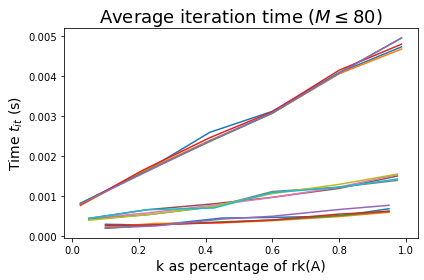

In [23]:
import random as rnd
rnd.seed(12)

plt.yscale('linear')

BB = Batches

for b in BB:
    bidxs = dfSum[dfSum['Batch'] == b]['BatchIndex'].unique()
    kidxs = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidxs[0])]['KIndex'].unique()
    nks = len(kidxs)
    for bidx in bidxs:
        ks = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TargetRk']
        
        origRank = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputRk'].iloc[0]
        xax = ks/origRank
            
        yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TimeIter']
        #yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['Our_time']
        
        matrixM = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputM'].iloc[0]
        
        
        if (matrixM < 160): 
            plt.plot(xax, yax)
            
            
plt.title(r'Average iteration time ($M \leq 80$)', fontsize=18)
plt.xlabel("k as percentage of rk(A)", fontsize=14)
plt.ylabel(r'Time $t_{it}$ (s)', fontsize=14)
plt.tight_layout()
plt.savefig('corerand_rank_timeleq80.png', format='png', dpi=300)
plt.show()

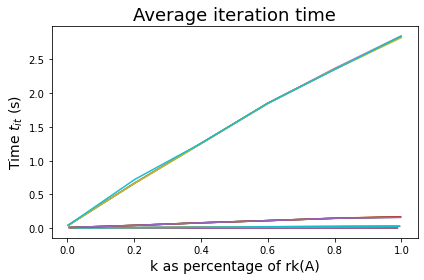

In [24]:
import random as rnd
rnd.seed(12)

plt.yscale('linear')

BB = Batches

for b in BB:
    bidxs = dfSum[dfSum['Batch'] == b]['BatchIndex'].unique()
    kidxs = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidxs[0])]['KIndex'].unique()
    nks = len(kidxs)
    for bidx in bidxs:
        ks = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TargetRk']
        
        origRank = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputRk'].iloc[0]
        xax = ks/origRank
            
        yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TimeIter']
        #yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['Our_time']
        
        matrixM = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputM'].iloc[0]
        
        plt.plot(xax, yax)
            
            
plt.title(r'Average iteration time', fontsize=18)
plt.xlabel("k as percentage of rk(A)", fontsize=14)
plt.ylabel(r'Time $t_{it}$ (s)', fontsize=14)
plt.tight_layout()
plt.savefig('corerand_rank_time.png', format='png', dpi=300)
plt.show()

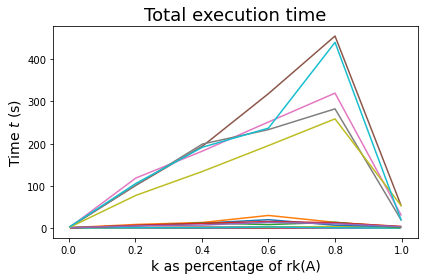

In [29]:
import random as rnd
rnd.seed(12)

plt.yscale('linear')

BB = Batches

for b in BB:
    bidxs = dfSum[dfSum['Batch'] == b]['BatchIndex'].unique()
    kidxs = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidxs[0])]['KIndex'].unique()
    nks = len(kidxs)
    for bidx in bidxs:
        ks = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TargetRk']
        
        origRank = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputRk'].iloc[0]
        xax = ks/origRank
            
        yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['Our_time']
        
        matrixM = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputM'].iloc[0]
        
        plt.plot(xax, yax)
            
            
plt.title(r'Total execution time', fontsize=18)
plt.xlabel("k as percentage of rk(A)", fontsize=14)
plt.ylabel(r'Time $t$ (s)', fontsize=14)
plt.tight_layout()
plt.savefig('corerand_rank_totaltime.png', format='png', dpi=300)
plt.show()

In [ ]:
import random as rnd
rnd.seed(12)

plt.yscale('linear')

BB = Batches

for b in BB:
    bidxs = dfSum[dfSum['Batch'] == b]['BatchIndex'].unique()
    kidxs = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidxs[0])]['KIndex'].unique()
    nks = len(kidxs)
    for bidx in bidxs:
        ks = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TargetRk']
        
        origRank = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputRk'].iloc[0]
        xax = ks/origRank
            
        yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['Our_time']
        
        matrixM = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputM'].iloc[0]
        
        plt.plot(xax, yax)
            
            
plt.title(r'Total execution time', fontsize=18)
plt.xlabel("k as percentage of rk(A)", fontsize=14)
plt.ylabel(r'Time $t$ (s)', fontsize=14)
plt.tight_layout()
plt.savefig('corerand_rank_totaltime.png', format='png', dpi=300)
plt.show()

In [28]:
dfSum.sort_values(by='TimeDelta_1Iter', ascending=False).head(40)


,InputName,InputM,InputN,InputRk,TargetRk,Opt_delta,Our_delta,Delta_diff,Svd_time,Our_time,Time_gain,Our_Iter,Batch,BatchIndex,KIndex,TimeIter,TimeDelta_1Iter,ConvenientIters
162,rnd_6_3_1,640,640,640,2,0.995155,0.995207,5.221445e-05,0.077310,2.811048,-2.733738,63,6,3,1,0.044620,0.032690,1.0
168,rnd_6_4_1,640,640,640,2,0.995261,0.995308,4.725790e-05,0.070705,2.415522,-2.344817,56,6,4,1,0.043134,0.027571,1.0
156,rnd_6_2_1,640,640,640,2,0.995410,0.995459,4.835913e-05,0.069866,2.456377,-2.386511,57,6,2,1,0.043094,0.026772,1.0
150,rnd_6_1_1,640,640,640,2,0.995053,0.995132,7.978131e-05,0.068463,3.044651,-2.976188,69,6,1,1,0.044125,0.024338,1.0
174,rnd_6_5_1,640,640,640,2,0.995378,0.995426,4.716481e-05,0.067585,3.488371,-3.420786,79,6,5,1,0.044157,0.023428,1.0
120,rnd_5_1_1,320,320,320,2,0.990031,0.990089,5.775035e-05,0.019828,1.534494,-1.514667,143,5,1,1,0.010731,0.009097,1.0
126,rnd_5_2_1,320,320,320,2,0.990111,0.990163,5.191130e-05,0.016412,1.451453,-1.435041,148,5,2,1,0.009807,0.006605,1.0
144,rnd_5_5_1,320,320,320,2,0.990978,0.991017,3.835544e-05,0.015741,1.110237,-1.094496,100,5,5,1,0.011102,0.004639,1.0
138,rnd_5_4_1,320,320,320,2,0.990355,0.990376,2.174937e-05,0.014504,0.780571,-0.766067,79,5,4,1,0.009881,0.004624,1.0
132,rnd_5_3_1,320,320,320,2,0.991032,0.991065,3.219262e-05,0.014007,1.024497,-1.010490,91,5,3,1,0.011258,0.002749,1.0


Sample plot for one error trend

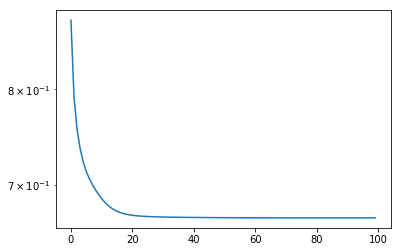

In [44]:
dfTemp = dfLogs['rnd_7_1_1']

plt.yscale('log')
plt.plot(dfTemp['Error'])
plt.show()

Comparison plot for the error trends varying the value of k

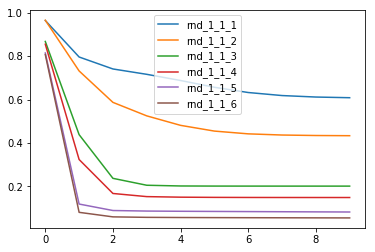

In [47]:
batch = '1'
batchidx = '1'

isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)

for tsk in filter(isTask, TaskNames):
    dfTemp = dfLogs[tsk]
    plt.plot(dfTemp['Error'][:10], label=tsk)
    
plt.legend(loc="best")
plt.show()

Comparison plot of the error distance w.r.t the optimum

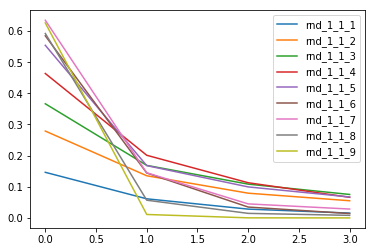

In [14]:
batch = '1'
batchidx = '1'

isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)

for tsk in filter(isTask, TaskNames):
    dfTemp = dfLogs[tsk]
    optimal_delta = float(dfSum[dfSum.InputName==tsk]['Opt_delta'])
    plt.plot((dfTemp['Error']-optimal_delta)[:4], label=tsk)
    
plt.legend(loc="best")
plt.show()

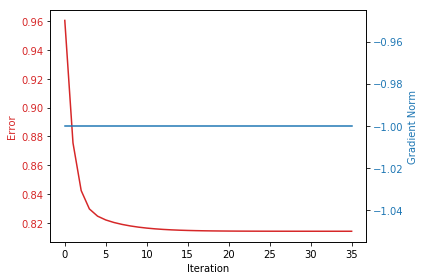

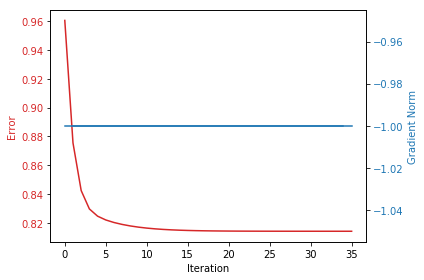

In [10]:
dfTemp = dfLogs['rnd_1_1_1']

upto = 50

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Error', color=color)
ax1.plot(dfTemp['Error'][:upto], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Gradient Norm', color=color)  
ax2.plot(dfTemp['GradientNorm'][:upto], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

# Plot the two subsequences for the gradient separated
gn = dfTemp['GradientNorm']
eveIdx = list(range(0, len(gn), 2))
oddIdx = list(range(1, len(gn), 2))

evegn = [gn[i] for i in eveIdx]
oddgn = [gn[i] for i in oddIdx]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Error', color=color)
ax1.plot(dfTemp['Error'][:upto], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Gradient Norm', color=color)  
ax2.plot(eveIdx[:upto], evegn[:upto], color=color)
ax2.plot(oddIdx[:upto], oddgn[:upto], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [ ]:
plt.plot(dfTemp['ErrorRatio'][:50])

In [ ]:
dfTemp['ErrorRatio']